**Function Transformer :** The functional transformer is a versatile tool in scikit-learn that allows you to apply custom transformation to your data. It is perticularly usuful when you need to apply a specific mathematicl transformation that isn't covered by the standard preprocessing functions.

In [21]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Here are some common use cases for each of these libraries:

**Pandas (pd):**
Data manipulation and analysis.
Handling missing data.
Merging and joining datasets.
Grouping and aggregating data.

**NumPy (np):**
Numerical computations.
Handling arrays and matrices.
Performing mathematical operations on arrays.
Generating random numbers.

**SciPy (stats):**
Statistical analysis.
Hypothesis testing.
Probability distributions.
Signal processing.

**Matplotlib (plt):**
Creating static, animated, and interactive visualizations.
Plotting graphs and charts.
Customizing plots with labels, titles, and legends.

**Seaborn (sns):**
Statistical data visualization.
Creating attractive and informative statistical graphics.
Visualizing distributions, relationships, and categorical data.

**Scikit-learn (train_test_split, accuracy_score, cross_val_score, LogisticRegression, DecisionTreeClassifier, FunctionTransformer, ColumnTransformer):**

train_test_split: Splitting datasets into training and testing sets.

accuracy_score: Evaluating the accuracy of a model.

cross_val_score: Performing cross-validation to assess model performance.

LogisticRegression: Implementing logistic regression for classification tasks.

DecisionTreeClassifier: Building decision tree classifiers.

FunctionTransformer: Applying custom transformations to data.

ColumnTransformer: Applying different preprocessing steps to different columns of a dataset.

In [23]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
# print(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

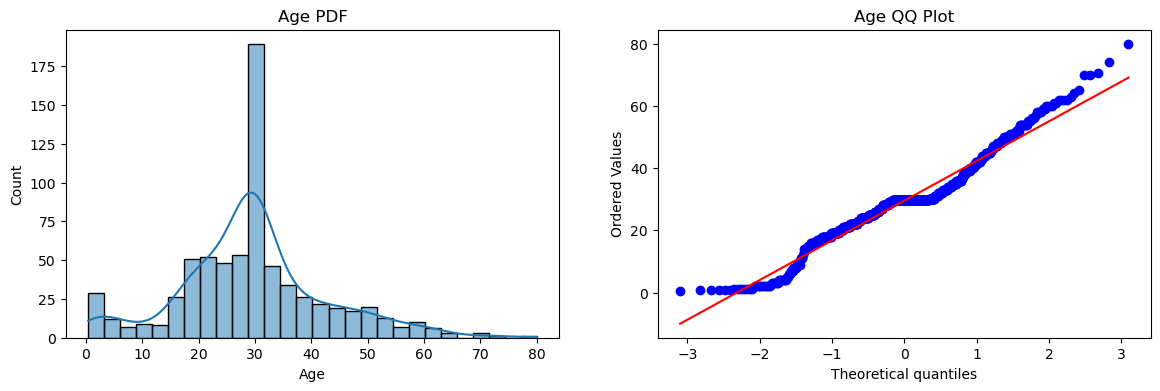

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
# The kde=True argument adds a Kernel Density Estimate (a smooth curve) to the histogram.
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()
#distplot is deprecated in Seaborn and will be removed in future versions. 
# You can replace distplot with displot or histplot. 

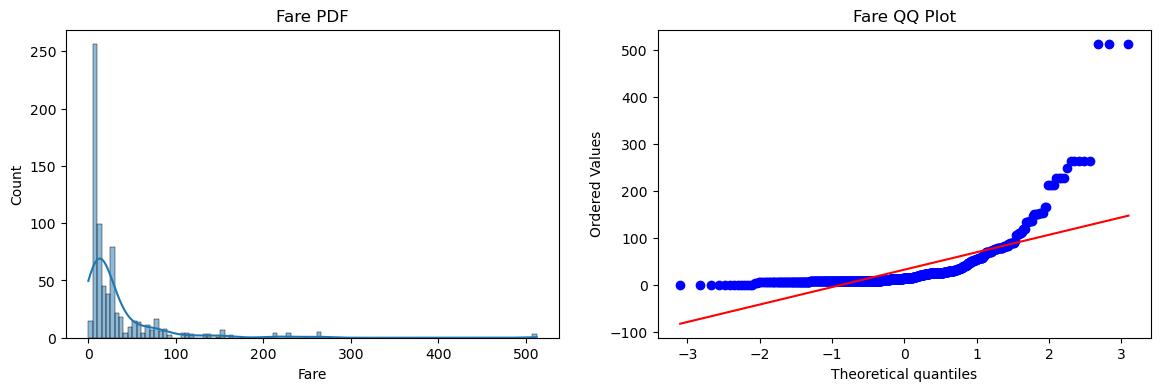

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [32]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [33]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6927374301675978


In [38]:
trf = FunctionTransformer(func=np.log1p)

In [40]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [50]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))


LR 0.678027465667915
DT 0.6577528089887641


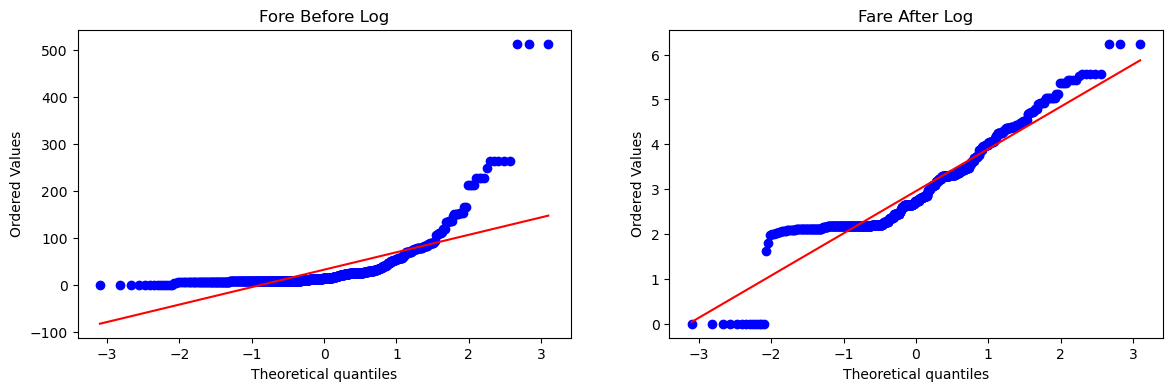

In [52]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

In [58]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [64]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [66]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


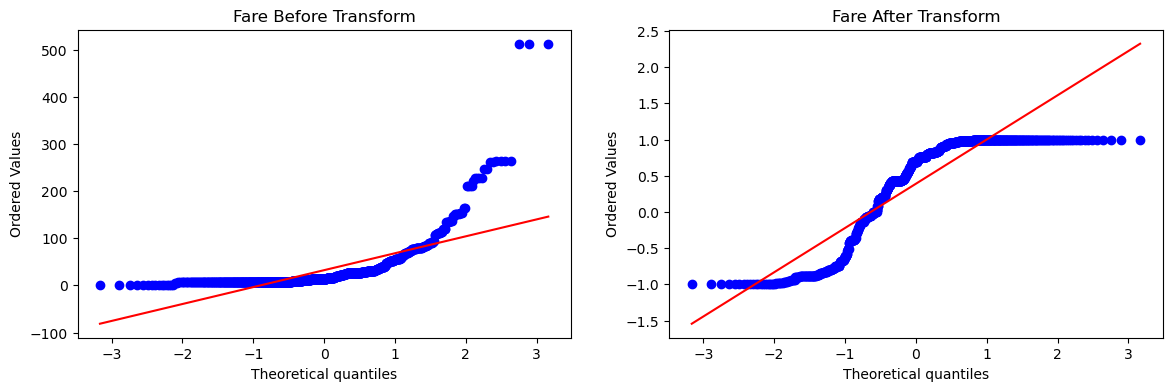

In [68]:
apply_transform(np.sin)